# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?
### 1.1 Approach 1: Graphical methods
#### 1.1.1 Histogram

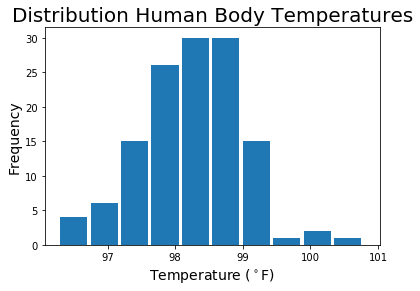

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

temp = df.temperature

plt.hist(temp, width = 0.4)
plt.xlabel('Temperature ($^\circ$F)', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title('Distribution Human Body Temperatures', fontsize=20)

plt.show()

Here, we can see a Gaussian-like shape to the data which does not strongly follow the bell-shape. 

In [4]:
from numpy import mean
from numpy import std
print ('mean=%.2f stdv=%.2f' % (mean(temp),std(temp)))

mean=98.25 stdv=0.73


#### 1.1.2 QQ Plots

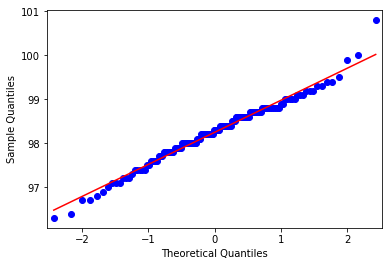

In [5]:
from statsmodels.graphics.gofplots import qqplot
qqplot(temp, line='s')
plt.show()

In this case, the QQ plots provide us more certainty about the normality. Here, we are more assured that the temperature distribution is normal.

### 1.2 Approach 2: Frequentist tests
D'Agostino's K-squared test
Jarque–Bera test
Anderson–Darling test
Cramér–von Mises criterion
Lilliefors test
Kolmogorov–Smirnov test
Shapiro–Wilk test 
Pearson's chi-squared test
#### 1.2.1 Shapiro-Wilk Test

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(temp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


#### 1.2.2 D'Agostino's K-squared test

In [7]:
from scipy.stats import normaltest
stat, p = normaltest(temp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [8]:
print ('The sample size is: ', df.shape[0])

The sample size is:  130


Sample size:
In general, the central limit theorem (CLT) holds when the sample size is larger than 30. We have sample size of 130 here, hence we could consider the sample size large enough for the CLT to hold.

Observation independence:
Note that CLT requires samples to be drawn with replacement to keep the independence between samples. However, since the sample size is significantly smaller than the total population, we may safely assume that the observations are independent.

## 3. Is the true population mean really 98.6 degrees F? 
• First, try a bootstrap hypothesis test. 
• Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
• In this situation, is it appropriate to use the t or z  statistic? 
• Now try using the other test. How is the result be different? Why? 

### 3.1 One-sample z-test
I would use one-sample test becuase we want to compare the population mean to a given value which is 98.6.
We can use z test because the sample size is larger than 30 (130>30).
The null hypothesis is that the population mean equals 96.8 degree F
H0: u = 98.6

In [9]:
# calculate z
SE = std(temp) / np.sqrt(len(temp))
print ('Std Error=%.3f'% SE)

z = (mean(temp) - 98.6) / SE
print ('Z value=%.3f '% z)

p = stats.norm.sf(abs(z))*2
print ('p-value=' ,p)

# interpret
alpha = 0.05
if p > alpha:
	print('Population mean equals 96.8 degree F (fail to reject H0)')
else:
	print('Population mean does not equal 96.8 degree F (reject H0)')

Std Error=0.064
Z value=-5.476 
p-value= 4.35231516588e-08
Population mean does not equal 96.8 degree F (reject H0)


### 3.2 One-sample t-test

In [10]:
stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

p-value < 0.05, we still reject the null hypothesis.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
• Which one is the correct one to use? 
• What do you notice? What does this tell you about the difference in application of the t and z  statistic? 

In [11]:
# Seed the random number generator:
np.random.seed(15)

# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(temp, size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [18]:
# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic=', z)
print('p-value=', p)

z-statistic: -2.83367954733
p-value: 0.0046015450048


In [12]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic', t)
print('p-value', p)

t-statistic -2.68826445858
p-value 0.0248671106512


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. 
The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. 
Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 
• As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
• Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [13]:
from scipy.stats import norm

# Save the critical value at 99.95% confidence:
z_critical = norm.ppf(0.9995)
z_critical

3.2905267314919255

In [16]:
# Calculate standard error of the mean:
SEM = np.std(temp)/np.sqrt(len(temp))
print('Standard Error of the Mean:', SEM)

# Calculate and save the margin of error:
MOE = z_critical * sem
print('Margin of Error:', MOE)

Standard Error of the Mean: 0.0640566146952
Margin of Error: 0.210780002983


In [20]:
# Calculate and save the 99.9% confidence interval:
CI = np.array([np.mean(temp) - MOE, np.mean(temp) + MOE])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.03845077  98.46001077]


In [24]:
# Calculate and save the 99.9% confidence interval:
CI = np.array([np.mean(temp) - moe, np.mean(temp) + moe])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.03845077  98.46001077]


## 6. Is there a significant difference between males and females in normal temperature? 
• What testing approach did you use and why? 
• Write a story with your conclusion in the context of the original problem. 

In [25]:
# Save temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


In [26]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


Since the significance level is $\alpha = 0.05$, we may reject the null hypothesis, and conclude that there is a significant difference in body temperature between male and female.